In [1]:
! kaggle dfsets download -d uciml/sms-spam-collection-dfset

'kaggle' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import nltk
from nltk.corpus import stopwords
from collections import Counter
nltk.download('all')
# Libraries for visualisation

import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'nltk'

In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install sklearn


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

In [1]:
pip install flask


  Obtaining dependency information for flask from https://files.pythonhosted.org/packages/fd/56/26f0be8adc2b4257df20c1c4260ddd0aa396cf8e75d90ab2f7ff99bc34f9/flask-2.3.3-py3-none-any.whl.metadata
  Obtaining dependency information for Werkzeug>=2.3.7 from https://files.pythonhosted.org/packages/9b/59/a7c32e3d8d0e546a206e0552a2c04444544f15c1da4a01df8938d20c6ffc/werkzeug-2.3.7-py3-none-any.whl.metadata
  Using cached itsdangerous-2.1.2-py3-none-any.whl (15 kB)
  Obtaining dependency information for click>=8.1.3 from https://files.pythonhosted.org/packages/00/2e/d53fa4befbf2cfa713304affc7ca780ce4fc1fd8710527771b58311a3229/click-8.1.7-py3-none-any.whl.metadata
  Using cached blinker-1.6.2-py3-none-any.whl (13 kB)
   ---------------------------------------- 0.0/96.1 kB ? eta -:--:--
   ------------ --------------------------- 30.7/96.1 kB ? eta -:--:--
   -------------------------------------- - 92.2/96.1 kB 871.5 kB/s eta 0:00:01
   ---------------------------------------- 96.1/96.1 kB 780

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.10.0 requires libclang>=13.0.0, which is not installed.
tensorflow 2.10.0 requires tensorflow-io-gcs-filesystem>=0.23.1, which is not installed.
tensorboard 2.10.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
tensorflow 2.10.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.


In [ ]:
df = pd.read_csv('spam.csv', encoding='latin-1')


In [ ]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4166,ham,Are you at work right now ?,NaN,NaN,NaN
2654,ham,Its sarcasm.. .nt scarcasim,NaN,NaN,NaN
3661,ham,"What are you doing in langport? Sorry, but I'l...",NaN,NaN,NaN
1320,ham,Just sent again. Do you scream and moan in bed...,NaN,NaN,NaN
64,ham,Ok lar i double check wif da hair dresser alre...,NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

# 1. df Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
# drop last three columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)


In [ ]:
df.sample(4)

,v1,v2
1317,spam,Win the newest ÛÏHarry Potter and the Order o...
5372,ham,"Ok., is any problem to u frm him? Wats matter?"
1006,spam,Panasonic & BluetoothHdset FREE. Nokia FREE. M...
2998,ham,"Oh, then your phone phoned me but it disconnected"


In [ ]:
# renaming the columns

df.rename(columns={'v1':'Target' , 'v2':'Text'},inplace=True)

In [ ]:
df.sample(5)

,Target,Text
1529,ham,Should I have picked up a receipt or something...
2968,ham,Ma head dey swell oh. Thanks for making my day
4531,ham,Ok both our days. So what are you making for d...
1717,spam,WOW! The Boys R Back. TAKE THAT 2007 UK Tour. ...
351,ham,If you're not in my car in an hour and a half ...


In [ ]:
# Convert Targets to binary values (spam: 1, ham: 0)
df['Target'] = df['Target'].map({'spam': 1, 'ham': 0})

In [ ]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#missing values
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [ ]:
# check for duplicated values
df.duplicated().sum()

403

In [ ]:
df.drop_duplicates(keep='first')

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [ ]:
df = df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().any()

False

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(5169, 2)

# 2. Exploratory df Analysis (EDA)

In [ ]:
df['Target'].value_counts()

0    4516
1     653
Name: Target, dtype: int64

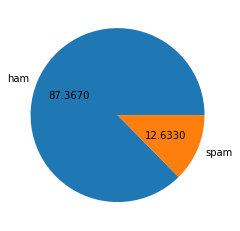

In [ ]:
plt.pie(df['Target'].value_counts(),labels=['ham','spam'],autopct="%0.4f")
plt.show()

In [ ]:
# df is imbalanced

In [ ]:
# Download the stopwords dfset

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Sarbani
[nltk_data]     Pal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Split the dfset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Target'], test_size=0.2, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# Fit and transform on the training df
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test df
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the classifier on the training df
nb_classifier.fit(X_train_tfidf, y_train)

# Predict on the test df
y_pred = nb_classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.971953578336557
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       889
           1       1.00      0.80      0.89       145

    accuracy                           0.97      1034
   macro avg       0.98      0.90      0.94      1034
weighted avg       0.97      0.97      0.97      1034

